In [1]:
%env CUDA_VISIBLE_DEVICES=0

env: CUDA_VISIBLE_DEVICES=0


In [4]:
!/home/pamessina/venv2/bin/python ../train_yolov8.py \
    --decent-images-only \
    --epochs 5 \
    --model-name-or-path "yolov8n.pt" \
    --batch-size 100 \
    --workers 4

script's arguments:
   model_name_or_path: yolov8n.pt
   decent_images_only: True
   validation_only: False
   image_size: 416
   batch_size: 100
   epochs: 5
   workers: 4
   debug: False
Found /home/pamessina/medvqa-workspace/cache/chest_imagenome/yolov5/images/train(decent_images_only).txt
Found /home/pamessina/medvqa-workspace/cache/chest_imagenome/yolov5/images/val(decent_images_only).txt
Found /home/pamessina/medvqa-workspace/cache/chest_imagenome/yolov5/images/test(decent_images_only).txt
Found /mnt/workspace/mimic-cxr-jpg/chest_imagenome_yolov5_labels
Found /home/pamessina/medvqa-workspace/cache/chest_imagenome/yolov5/config(decent_images_only).yaml
Ultralytics YOLOv8.0.58 🚀 Python-3.10.10 torch-1.13.1+cu117 CUDA:0 (GeForce RTX 3090, 24267MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/home/pamessina/medvqa-workspace/cache/chest_imagenome/yolov5/config(decent_images_only).yaml, epochs=5, patience=50, batch=100, imgsz=416, save=True, save_period=-1, ca


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
        2/5      8.08G      1.179     0.7877      1.317       1285        416: 1
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all       1934      69098      0.902      0.858      0.892      0.611

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
        3/5      8.08G      1.128     0.7057      1.282       1231        416: 1
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all       1934      69098       0.91      0.865      0.901      0.629

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
        4/5      8.08G      1.083     0.6569      1.258        897        416: 1
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all       1934      69098      0.915      0.866      0.906      0.645

      Epo

In [5]:
!ls /home/pamessina/medvqa-workspace/cache/chest_imagenome/train3

args.yaml					train_batch0.jpg
confusion_matrix.png				train_batch1.jpg
events.out.tfevents.1680241086.calfuco.12763.0	train_batch2.jpg
F1_curve.png					val_batch0_labels.jpg
labels_correlogram.jpg				val_batch0_pred.jpg
labels.jpg					val_batch1_labels.jpg
P_curve.png					val_batch1_pred.jpg
PR_curve.png					val_batch2_labels.jpg
R_curve.png					val_batch2_pred.jpg
results.csv					weights
results.png


In [7]:
from IPython.display import Image

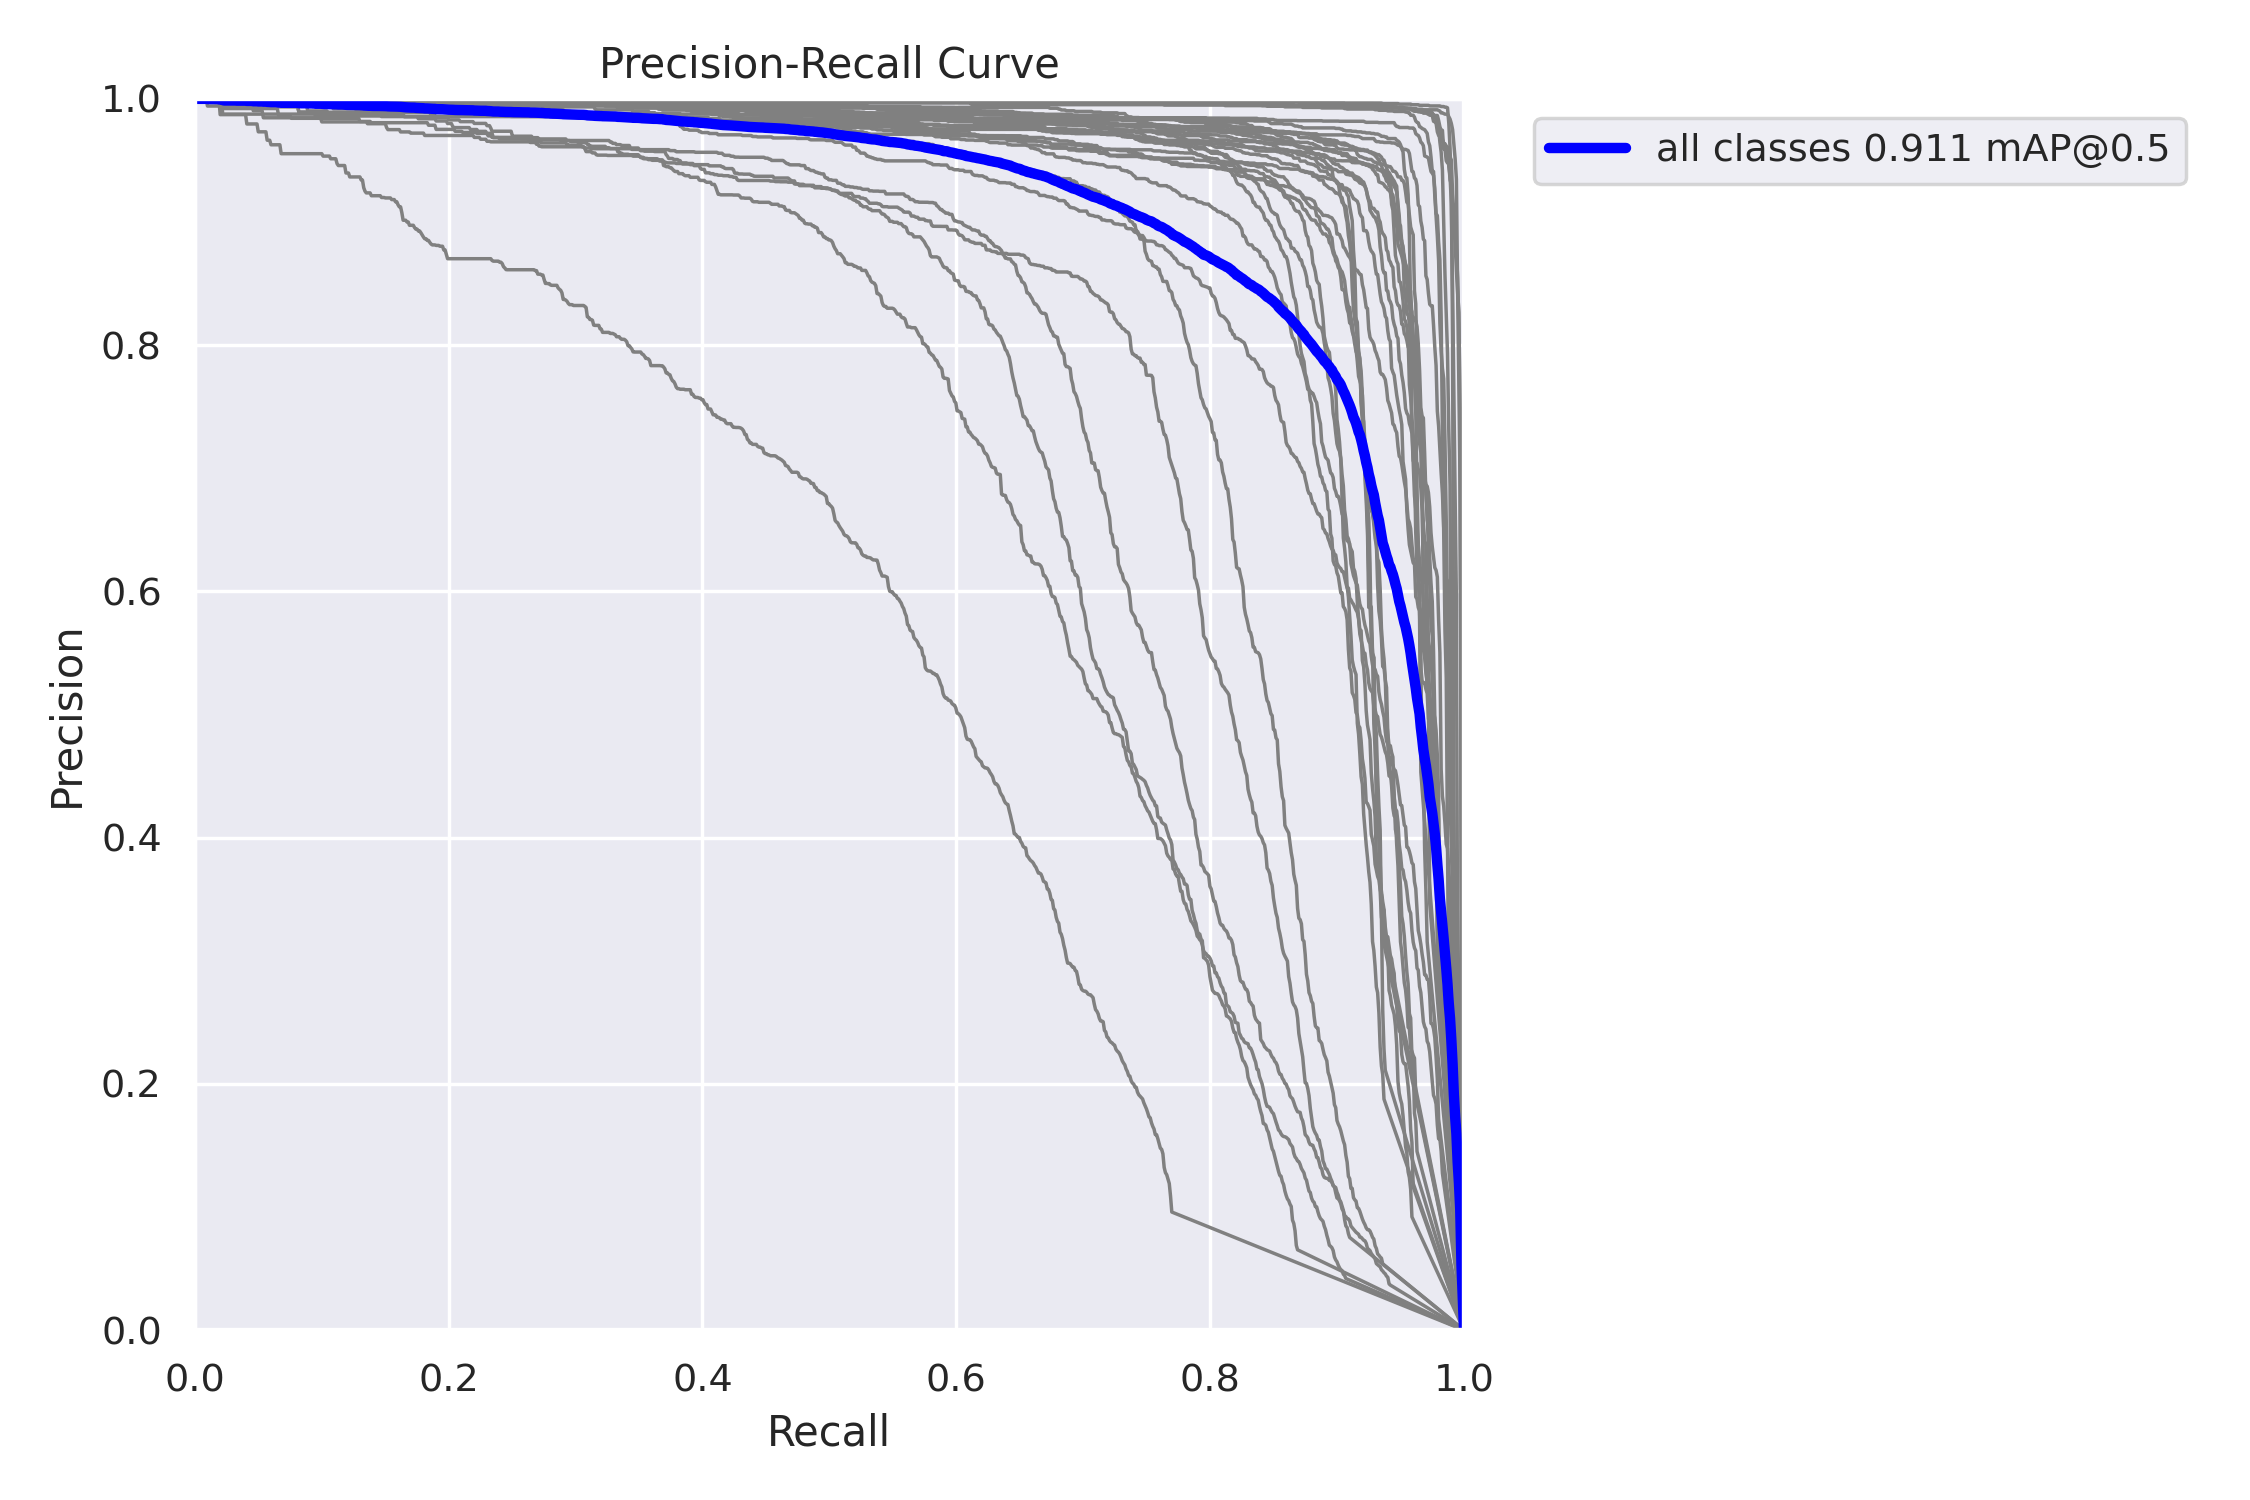

In [8]:
Image('/home/pamessina/medvqa-workspace/cache/chest_imagenome/train3/PR_curve.png')

In [14]:
!/home/pamessina/venv2/bin/python ../eval_yolov8.py \
    --eval-dataset-name "chest_imagenome__mimiccxr_test_set" \
    --weights-path "/home/pamessina/medvqa-workspace/cache/chest_imagenome/train3/weights/best.pt" \
    --decent-images-only

script's arguments:
   eval_dataset_name: chest_imagenome__mimiccxr_test_set
   weights_path: /home/pamessina/medvqa-workspace/cache/chest_imagenome/train3/weights/best.pt
   decent_images_only: True
   conf: 0.1
   max_det: 36
--------------------------------------------------
Evaluating YOLOv8

1) Preparing eval data for YOLOv8
Found /home/pamessina/medvqa-workspace/cache/chest_imagenome/yolov5/images/chest_imagenome__mimiccxr_test_set(decent_images_only).txt

2) Running YOLOv8 in eval mode
3389it [00:47, 71.40it/s]

3) Computing and saving metrics
Computing Mean Absolute Error (MAE) ...
Computing Mean Intersection Over Union (IOU) ...
Computing Precision, Recall, and F1 Score at IOU thresholds [0.5, 0.6, 0.7, 0.8, 0.9] ...
Saved bbox metrics to: /mnt/data/pamessina/workspaces/medvqa-workspace/results/visual_module/20230331_052620_chest-imagenome_yolov8/chest_imagenome__mimiccxr_test_set__bbox_metrics(decent).pkl
Saved metadata to: /mnt/data/pamessina/workspaces/medvqa-workspace/resu

In [16]:
!/home/pamessina/venv2/bin/python ../eval_yolov8.py \
    --eval-dataset-name "chest_imagenome_gold" \
    --weights-path "/home/pamessina/medvqa-workspace/cache/chest_imagenome/train3/weights/best.pt" \
    --decent-images-only \
    --save-predictions

script's arguments:
   eval_dataset_name: chest_imagenome_gold
   weights_path: /home/pamessina/medvqa-workspace/cache/chest_imagenome/train3/weights/best.pt
   decent_images_only: True
   conf: 0.1
   max_det: 36
   save_predictions: True
--------------------------------------------------
Evaluating YOLOv8

1) Preparing eval data for YOLOv8
Found /home/pamessina/medvqa-workspace/cache/chest_imagenome/yolov5/images/chest_imagenome_gold(decent_images_only).txt

2) Running YOLOv8 in eval mode
1000it [00:15, 63.86it/s]

3) Computing and saving metrics
Computing Mean Absolute Error (MAE) ...
Computing Mean Intersection Over Union (IOU) ...
Computing Precision, Recall, and F1 Score at IOU thresholds [0.5, 0.6, 0.7, 0.8, 0.9] ...
Saved bbox metrics to: /mnt/data/pamessina/workspaces/medvqa-workspace/results/visual_module/20230331_065249_chest-imagenome_yolov8/chest_imagenome_gold__bbox_metrics(decent).pkl
Saved metadata to: /mnt/data/pamessina/workspaces/medvqa-workspace/results/visual_modul

In [25]:
from importlib import reload
import medvqa

In [44]:
reload(medvqa.datasets.chest_imagenome)
reload(medvqa.datasets.chest_imagenome.chest_imagenome_dataset_management)

<module 'medvqa.datasets.chest_imagenome.chest_imagenome_dataset_management' from '/home/pamessina/medvqa/medvqa/datasets/chest_imagenome/chest_imagenome_dataset_management.py'>

In [45]:
from medvqa.datasets.chest_imagenome.chest_imagenome_dataset_management import visualize_predicted_bounding_boxes__yolov8

Predicted bounding boxes for 3ff536d0-58474ed7-f99f6fc1-54ca116d-4838ad24:
Predicted bounding boxes are in blue
Ground truth bounding boxes are in red


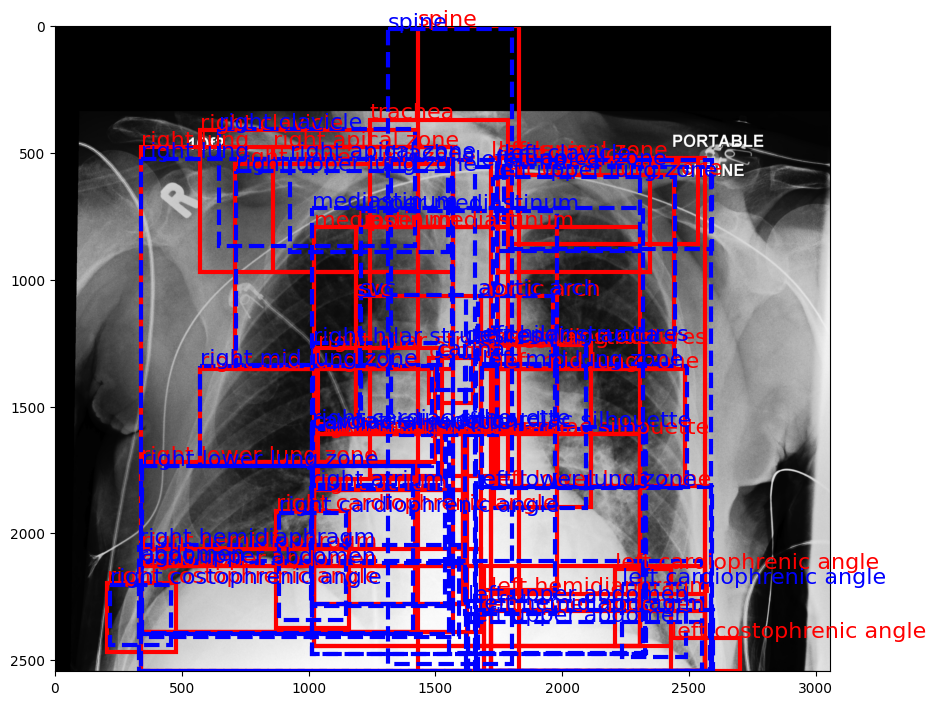

In [50]:
visualize_predicted_bounding_boxes__yolov8(
#     dicom_id='7c7f2fb4-5884c617-78eb0ee3-9a17ad85-514d198b',
    predictions_path='/mnt/data/pamessina/workspaces/medvqa-workspace/results/visual_module/20230331_065249_chest-imagenome_yolov8/chest_imagenome_gold__predictions(decent).pkl',
)

In [20]:
from medvqa.utils.files import load_pickle

In [32]:
tmp = load_pickle('/mnt/data/pamessina/workspaces/medvqa-workspace/results/visual_module/20230331_004717_chest-imagenome_yolov8/chest_imagenome_gold__bbox_metrics(decent).pkl')

In [30]:
!ls -lh "/mnt/data/pamessina/workspaces/medvqa-workspace/results/visual_module/20230331_004322_chest-imagenome_yolov8/chest_imagenome_gold__bbox_metrics(decent).pkl"

-rw-rw-r-- 1 pamessina pamessina 4 Mar 31 00:43 '/mnt/data/pamessina/workspaces/medvqa-workspace/results/visual_module/20230331_004322_chest-imagenome_yolov8/chest_imagenome_gold__bbox_metrics(decent).pkl'
